In [104]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import descartes
from multiprocessing import Pool
import warnings
import random
warnings.filterwarnings('ignore')

## Load data

In [59]:
listings_df = pd.read_csv("listings.csv", dtype='unicode')
neighbourhoods_geodf = gpd.read_file('neighbourhoods.geojson')

## View Lisitings Data

In [14]:
## Look at what is in the file
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20191105115249,2019-11-06,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.58
1,38151,https://www.airbnb.com/rooms/38151,20191105115249,2019-11-06,Double room/ lounge,NaN,"Comfortable, large double room /lounge area av...","Comfortable, large double room /lounge area av...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
2,13913,https://www.airbnb.com/rooms/13913,20191105115249,2019-11-06,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,...,f,f,moderate,f,f,2,1,1,0,0.17


## Decided to look at which are the most expensive boroughs to stay in

In [150]:
# ## Easy to view all column names

for i in listings_df.columns:
    print(i)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

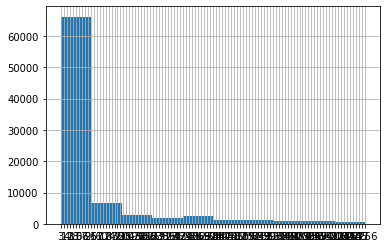

In [151]:
listings_df['host_listings_count'].hist()

In [ ]:
# ## This shows 144 neighbourhoods although airbnb only provide 32
# print(len(listings_df['neighbourhood'].unique()))

# ## Take a look at why 
# for i in listings_df['neighbourhood'].unique():
#     print(i)

## Using geopandas to classify Airbnbs into Boroughs

In [ ]:
## Instead we can use the polygon defintion of the neighbourhoods and check whether lat long sits within it then rename

In [60]:
listings_df['latitude'] = listings_df['latitude'].astype(float)
listings_df['longitude'] = listings_df['longitude'].astype(float)

In [63]:
from shapely.geometry import Point, Polygon
for i in range(0, listings_df.shape[0]):# listings_df.shape[0]
    for neighbourhood in neighbourhoods_geodf['neighbourhood']:
        if neighbourhoods_geodf['geometry'][neighbourhoods_geodf['neighbourhood']==neighbourhood].contains(Point(listings_df['longitude'][i],listings_df['latitude'][i])).bool():
                listings_df['neighbourhood'][i] = neighbourhood


In [64]:
listings_df.to_csv('listings_neighbourhood_classified.csv', index=False)

In [95]:
listings_neighbourhood_classified = pd.read_csv('listings_neighbourhood_classified.csv', dtype='unicode')

In [97]:
listings_neighbourhood_classified.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,11551,https://www.airbnb.com/rooms/11551,20191105115249,2019-11-06,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.58
1,1,38151,https://www.airbnb.com/rooms/38151,20191105115249,2019-11-06,Double room/ lounge,NaN,"Comfortable, large double room /lounge area av...","Comfortable, large double room /lounge area av...",none,...,f,f,flexible,f,f,1,0,1,0,NaN
2,2,13913,https://www.airbnb.com/rooms/13913,20191105115249,2019-11-06,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,...,f,f,moderate,f,f,2,1,1,0,0.17
3,3,38407,https://www.airbnb.com/rooms/38407,20191105115249,2019-11-06,Canary Wharf Immaculate Apt for 2,"The bright, light and stylish apartment in Can...","An entire bright, light and stylish apartment....","The bright, light and stylish apartment in Can...",none,...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.23
4,4,90700,https://www.airbnb.com/rooms/90700,20191105115249,2019-11-06,Sunny Notting Hill flat & terrace,This is a home not a hotel - for the cost gues...,This charming 1 bedroom with en-suite bathroom...,This is a home not a hotel - for the cost gues...,none,...,t,f,strict_14_with_grace_period,f,f,2,2,0,0,3.33


In [105]:
listings_neighbourhood_classified['price'][listings_neighbourhood_classified['price'] == '2017-08-12'] = np.nan

In [99]:
listings_neighbourhood_classified['price'] = listings_neighbourhood_classified['price'].str.replace("$","")

In [100]:
listings_neighbourhood_classified['price'] = listings_neighbourhood_classified['price'].str.replace(",","")

In [106]:
listings_neighbourhood_classified['price'] = listings_neighbourhood_classified['price'].astype(float)

In [92]:
listings_neighbourhood_classified.head(2)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,11551,https://www.airbnb.com/rooms/11551,20191105115249,2019-11-06,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.58
1,1,38151,https://www.airbnb.com/rooms/38151,20191105115249,2019-11-06,Double room/ lounge,NaN,"Comfortable, large double room /lounge area av...","Comfortable, large double room /lounge area av...",none,...,f,f,flexible,f,f,1,0,1,0,NaN


In [135]:
average_price_df = listings_neighbourhood_classified[['neighbourhood','price']].groupby('neighbourhood').mean()

In [136]:
average_price_df['No. of properties'] = listings_neighbourhood_classified[['neighbourhood','price']].groupby('neighbourhood').count()

In [137]:
average_price_df['price'] = round(average_price_df['price'])

In [145]:
neighbourhood_prices = neighbourhoods_geodf.merge(average_price_df, left_on='neighbourhood', right_on='neighbourhood')

In [146]:
neighbourhood_prices['price'] = round(neighbourhood_prices['price'])

In [147]:
neighbourhood_prices

,neighbourhood,neighbourhood_group,geometry,price,No. of properties
0,Kingston upon Thames,None,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51...",78.0,553
1,Croydon,None,"MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51...",63.0,1105
2,Bromley,None,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2...",64.0,679
3,Hounslow,None,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51...",99.0,1029
4,Ealing,None,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51...",80.0,1747
5,Havering,None,"MULTIPOLYGON (((0.15869 51.51219, 0.15871 51.5...",74.0,255
6,Hillingdon,None,"MULTIPOLYGON (((-0.40407 51.61318, -0.40388 51...",64.0,667
7,Harrow,None,"MULTIPOLYGON (((-0.40407 51.61318, -0.40320 51...",88.0,491
8,Brent,None,"MULTIPOLYGON (((-0.19657 51.52765, -0.19685 51...",93.0,2561
9,Barnet,None,"MULTIPOLYGON (((-0.19990 51.67017, -0.19970 51...",88.0,1657


In [113]:
neighbourhood_prices.to_csv('neighbourhood_prices.csv')

In [111]:
neighbourhoods_geodf['price'][0]

KeyError: 'price'

IndexError: list index out of range

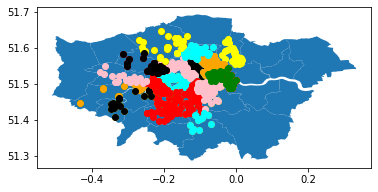

In [203]:
colours = ['yellow','orange','green', 'red', 'pink','cyan', 'k', 
           'yellow','orange','green', 'red', 'pink','cyan', 'k', 
           'yellow','orange','green', 'red', 'pink','cyan', 'k', 
           'yellow','orange','green', 'red', 'pink','cyan', 'k', 
           'yellow','orange','green', 'red', 'pink','cyan', 'k', 
           'yellow','orange','green', 'red', 'pink','cyan', 'k', 
           'yellow','orange','green', 'red', 'pink','cyan', 'k']

ax = neighbourhoods_geodf['geometry'].plot()

for n in range(0,test_list['neighbourhood'].shape[0]):

    long = test_list['longitude'][test_list['neighbourhood']==test_list['neighbourhood'][n]]
    lat = test_list['latitude'][test_list['neighbourhood']==test_list['neighbourhood'][n]]
    gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(long, lat))
    gdf.plot(ax=ax, color=colours[n])


## View Data

In [1]:
neighbourhoods_geodf.head(10)

NameError: name 'neighbourhoods_geodf' is not defined

In [87]:
neighbourhoods_geodf['neighbourhood']

0       Kingston upon Thames
1                    Croydon
2                    Bromley
3                   Hounslow
4                     Ealing
5                   Havering
6                 Hillingdon
7                     Harrow
8                      Brent
9                     Barnet
10                   Enfield
11            Waltham Forest
12                 Redbridge
13                    Sutton
14                   Lambeth
15                 Southwark
16                  Lewisham
17                 Greenwich
18                    Bexley
19      Richmond upon Thames
20                    Merton
21                Wandsworth
22    Hammersmith and Fulham
23    Kensington and Chelsea
24            City of London
25               Westminster
26                    Camden
27             Tower Hamlets
28                 Islington
29                   Hackney
30                  Haringey
31                    Newham
32      Barking and Dagenham
Name: neighbourhood, dtype: object

In [16]:
l = [random.randint(0,10) for i in range(33)]

neighbourhoods_geodf['nums'] = l

## Explore Data

### Look at Neighbourhood in geopandas

NameError: name 'ax' is not defined

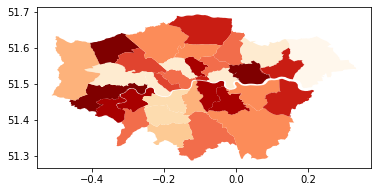

In [20]:
neighbourhoods_geodf.plot(column='nums', cmap='OrRd')
# remove the axis
ax.axis('off')

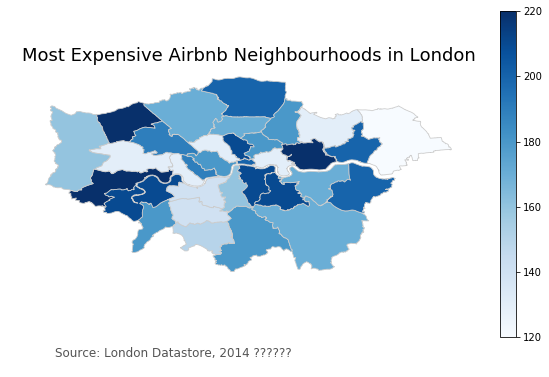

In [36]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'nums'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
neighbourhoods_geodf.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
            
            # remove the axis
ax.axis('off')
            
            # add a title
ax.set_title('Most Expensive Airbnb Neighbourhoods in London', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: London Datastore, 2014 ??????',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

In [37]:
listings_df = pd.read_csv("listings.csv", dtype='unicode')

In [41]:
[print(i) for i in listings_df.columns]

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [54]:
weekly_price_df = listings_df[['weekly_price','latitude','longitude','host_id']]
weekly_price_df.head(10)

,weekly_price,latitude,longitude,host_id
0,$645.00,51.46225,-0.11732,43039
1,NaN,51.4194,-0.08722,163634
2,$333.00,51.56802,-0.11121,54730
3,$530.00,51.49995,-0.02624,164566
4,NaN,51.51074,-0.19853,491286
5,$600.00,51.48796,-0.16898,60302
6,NaN,51.55071,-0.08547,497366
7,"$1,378.00",51.52098,-0.14002,67564
8,NaN,51.44004,-0.18755,498201
9,$891.00,51.50178,-0.21627,499704


In [55]:
weekly_price_df.shape[0]

85068

In [58]:
weekly_price_df['host_id'].unique().shape[0]

53476

In [59]:
weekly_price_df['weekly_price'] = weekly_price_df['weekly_price'].str.replace('$', '')
weekly_price_df['weekly_price'] = weekly_price_df['weekly_price'].str.replace(',', '').astype(float).astype(float)

In [60]:
weekly_price_df = weekly_price_df.dropna()
weekly_price_df.head(10)

,weekly_price,latitude,longitude,host_id
0,645.0,51.46225,-0.11732,43039
2,333.0,51.56802,-0.11121,54730
3,530.0,51.49995,-0.02624,164566
5,600.0,51.48796,-0.16898,60302
7,1378.0,51.52098,-0.14002,67564
9,891.0,51.50178,-0.21627,499704
10,350.0,51.41562,-0.19489,500558
13,150.0,51.5873,-0.08606,167107
16,300.0,51.46441,-0.12669,501399
17,630.0,51.44687,-0.21874,102813


In [61]:
weekly_price_df.to_csv('weekly_price_data.csv')

In [65]:
weekly_price_df['host_id'][weekly_price_df['host_id'].duplicated()]

20         167107
22         103583
90         247650
128        216660
130        211108
           ...   
52808     8957730
53300    28488607
53386    51014603
53397    11088597
53407    12178266
Name: host_id, Length: 954, dtype: object

In [74]:
weekly_price_df[weekly_price_df['host_id'] =='167107']

,weekly_price,latitude,longitude,host_id
13,150.0,51.5873,-0.08606,167107
20,170.0,51.5886,-0.08805,167107
3411,200.0,51.58801,-0.08718,167107
